# Belorussian writers

We are going to look through all authors at https://www.livelib.ru/authors/belorussian and analyze their tags. For example, here: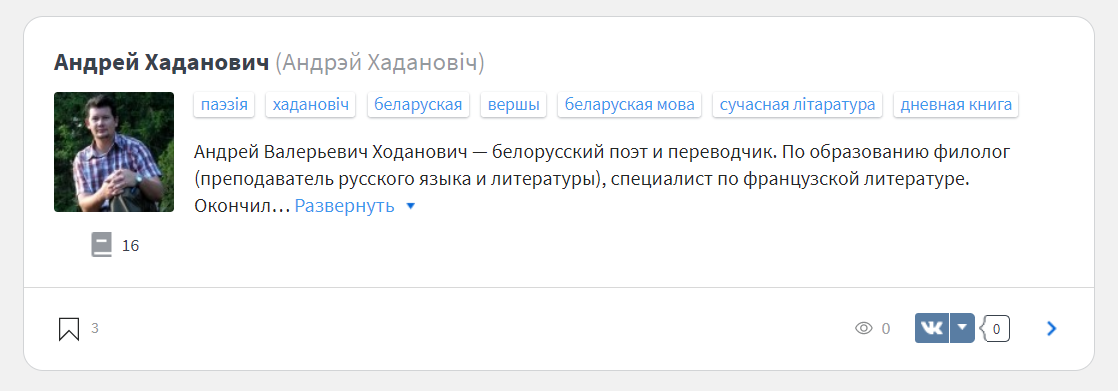

we can see such tags as _poetry, belorussian language, modern literature_.

We'd like to find out which tags are the most common and find some correlations. Is it true that modern authors write more prose than poetry? Let's find out.

## Libraries

The libraries and their versions used:
1. BeautifulSoup - x.xx
2. Pandas - x.xx

## Collecting data

First, we need to parse the tags from the pages of the site.

In [1]:
from bs4 import BeautifulSoup
import urllib
import time

In [2]:
def get_blocks(url):
    req = urllib.request.urlopen(url)
    if req.status != 200:
        raise Exception(f'Problems with getting response from {url}')
    text = req.read().decode()

    soup = BeautifulSoup(text, 'lxml')
    return soup.find_all('div', 'with-pad')

That's one element of `blocks`:

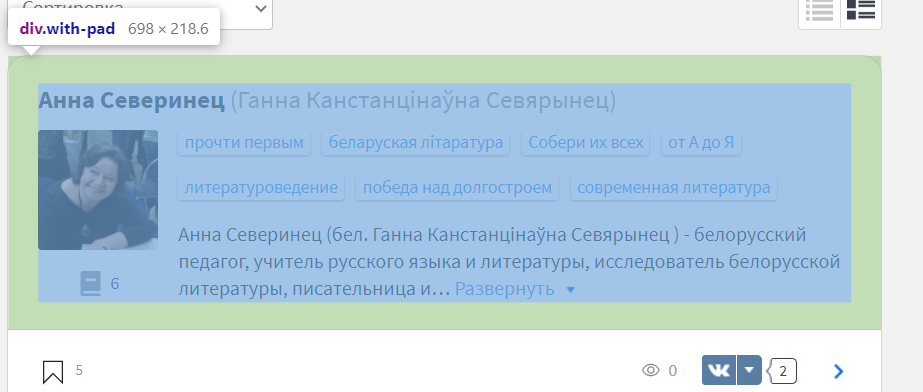

Let's get the data we need: the authors' names and tags.

**If you execute the code below, pay attention to possible problems due to LiveLib's protection** (it makes you enter captcha).

In [9]:
url = 'https://www.livelib.ru/authors/belorussian~'
i = 1

pages = []

while True:
    try:
        blocks = get_blocks(url + str(i))
        if len(blocks) == 0:
            break
        pages.append(blocks)
        time.sleep(5) # I had to add this because of LiveLib captcha
        i += 1
    except Exception as e:
        print(e)
        break

In [ ]:
data = {}

for blocks in pages:
    for block in blocks:
        name = block.a.text
        tags = [a.text for a in block.find_all('a', 'label-tag')]
    
    # Some entries don't have tags - they're not interesting for us
    if tags != []:
        data[name] = tags

In [7]:
# ensure everything went okay
print(len(data))
print(list(data.items())[:3])

data

9
[('Андрей Макаёнок (Андрэй Ягоравіч Макаёнак)', ['белорусская литература', 'пьеса', 'Макаёнак', 'беларуская мова', 'беларусь', 'классическая литература', 'хх стагоддзе']), ('Уладзімір Садоўскі', ['зомби', 'ужасы', 'белорусская литература', 'фантастика', 'беларусь', 'хоррор', 'рассказы']), ('Віталь Вольскі (Виталий Фридрихович Вольский)', ['белорусская литература', '222334666', 'пьеса', 'детская литература', 'природа', 'путешествия', 'классическая литература'])]


{'Андрей Макаёнок (Андрэй Ягоравіч Макаёнак)': ['белорусская литература',
  'пьеса',
  'Макаёнак',
  'беларуская мова',
  'беларусь',
  'классическая литература',
  'хх стагоддзе'],
 'Уладзімір Садоўскі': ['зомби',
  'ужасы',
  'белорусская литература',
  'фантастика',
  'беларусь',
  'хоррор',
  'рассказы'],
 'Віталь Вольскі (Виталий Фридрихович Вольский)': ['белорусская литература',
  '222334666',
  'пьеса',
  'детская литература',
  'природа',
  'путешествия',
  'классическая литература'],
 'Янина Пинчук (Яніна Уладзіміраўна Пінчук)': ['беларуская літаратура',
  'белорусский язык',
  'белорусская литература',
  'малады аўтар',
  'альтэрнатыўная гісторыя',
  'дебют',
  'яніна пінчук'],
 'Борис Саченко (Барыс Iванавiч Сачанка)': ['пераклад',
  'не открывает',
  'советская'],
 'Алесь Асташонак': ['белліт', 'рассказы', 'беларуская літаратура'],
 'Аксана Данільчык': ['беларуская літаратура',
  'сабиэл',
  '5k',
  'by',
  'пераклады',
  'беларуская мова',
  'белорусская литература'],
 'Ян

## Building DataFrame

In [10]:
import pandas as pd

In [12]:
df = pd.DataFrame(index = data.keys())

for key, val in data.items():
    df.loc[key, :] = False
    for v in val:
        if v not in df.columns:
            df[v] = False
    df.loc[key, val] = True

In [13]:
df.head()

,белорусская литература,пьеса,Макаёнак,беларуская мова,беларусь,классическая литература,хх стагоддзе,зомби,ужасы,фантастика,...,не открывает,советская,белліт,сабиэл,5k,by,пераклады,беларуская крытыка,хіх ст.,Навука
Андрей Макаёнок (Андрэй Ягоравіч Макаёнак),True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Уладзімір Садоўскі,True,False,False,False,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Віталь Вольскі (Виталий Фридрихович Вольский),True,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Янина Пинчук (Яніна Уладзіміраўна Пінчук),True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Борис Саченко (Барыс Iванавiч Сачанка),False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [14]:
df.to_csv('data.csv', sep='\t', encoding='utf-8')

That's all for this notebook: we've collected the data. Read about processing and analyzing this data in the next notebook.